# V1

Found 4 faces!


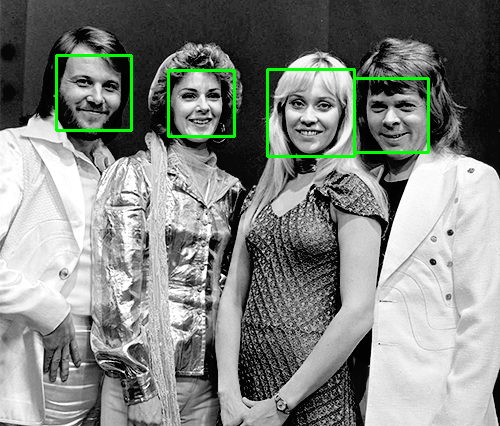

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



import cv2
import sys
# Get user supplied values
imagePath = "/content/abba.png"
cascPath = "/content/haarcascade_frontalface_default.xml"



# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)



# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)




print ("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
import cv2
import sys

cascPath = "/content/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    # break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

error: ignored

In [ ]:
print(frame)

None


In [ ]:
# import the opencv library
import cv2
from google.colab.patches import cv2_imshow

# define a video capture object
vid = cv2.VideoCapture(0)

while(True):
	
  # Capture the video frame
  # by frame
  ret, frame = vid.read()

  # Display the resulting frame
  # cv2.imshow('frame', frame)
  cv2_imshow(frame)

  # the 'q' button is set as the
  # quitting button you may use any
  # desired button of your choice
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()


AttributeError: ignored

In [ ]:
print(frame)

None


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

OSError: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


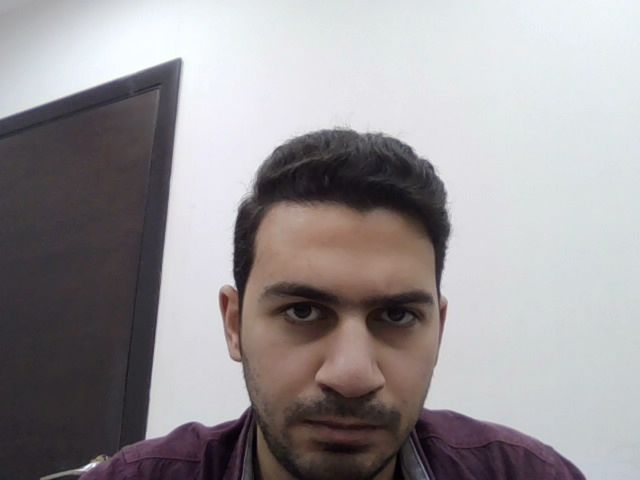

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# v2

In [2]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=965ec444087e8064c14ca6b17125e3922bd20ccbe05ba7bfa57194110a1fdaee
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Loading known faces...
Processing unknown faces...
Filename 51ER7bGtSDL._AC_.jpg, found 1 face(s)
 - salah from [False, True, True, True, False, False, False, False, False, False]


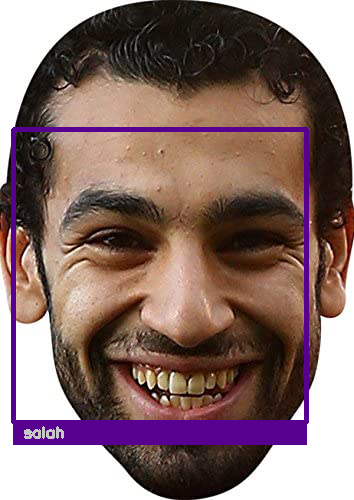

Filename 1523353535_033436_noticia_normal.jpg, found 1 face(s)
 - messi from [False, False, False, False, True, True, True, True, True, False]


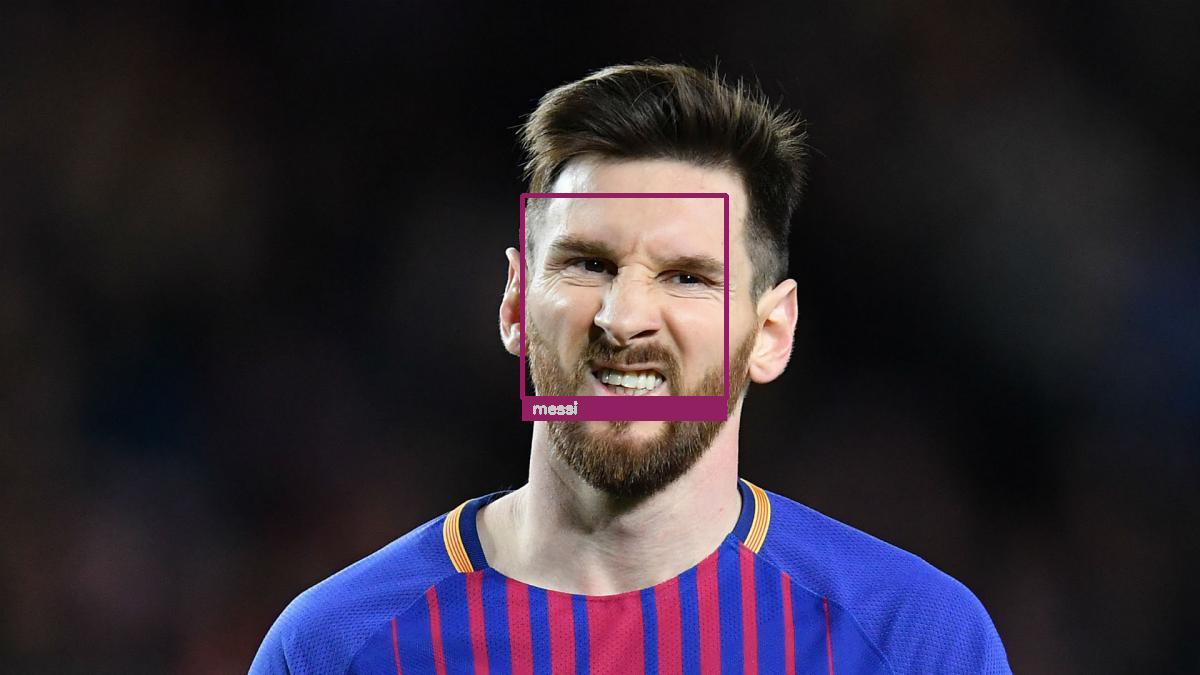

Filename PES2017-Mohammad-Salah-From-AS-Roma-Face-by-Mayaro-FM.jpg, found 1 face(s)
 - salah from [True, True, True, True, False, False, False, False, False, False]


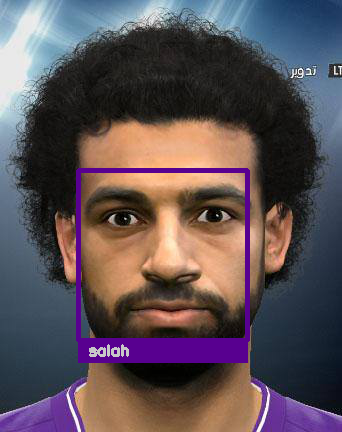

Filename images (3).jpg, found 1 face(s)
 - messi from [False, False, False, False, True, True, True, True, True, False]


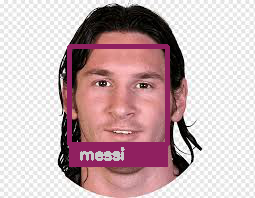

Filename download (1).jpg, found 1 face(s)
 - messi from [False, False, False, False, True, True, True, True, True, True]


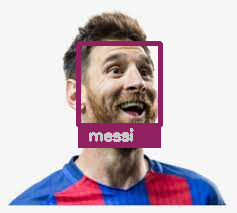

Filename images.jpg, found 1 face(s)
 - messi from [False, False, False, False, True, True, True, True, True, False]


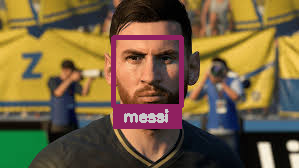

Filename images (5).jpg, found 1 face(s)
 - salah from [True, True, True, True, False, False, False, False, False, False]


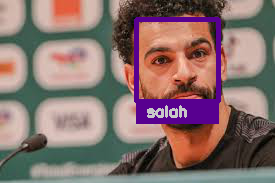

In [4]:
import face_recognition
import os
import cv2
from google.colab.patches import cv2_imshow


KNOWN_FACES_DIR = '/content/sample_data/known_faces'
UNKNOWN_FACES_DIR = '/content/sample_data/unknown_faces'
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'  # default: 'hog', other one can be 'cnn' - CUDA accelerated (if available) deep-learning pretrained model


# Returns (R, G, B) from name
def name_to_color(name):
    # Take 3 first letters, tolower()
    # lowercased character ord() value rage is 97 to 122, substract 97, multiply by 8
    color = [(ord(c.lower())-97)*8 for c in name[:3]]
    return color


print('Loading known faces...')
known_faces = []
known_names = []

# We oranize known faces as subfolders of KNOWN_FACES_DIR
# Each subfolder's name becomes our label (name)
for name in os.listdir(KNOWN_FACES_DIR):

    # Next we load every file of faces of known person
    for filename in os.listdir(f'{KNOWN_FACES_DIR}/{name}'):

        # Load an image
        image = face_recognition.load_image_file(f'{KNOWN_FACES_DIR}/{name}/{filename}')

        # Get 128-dimension face encoding
        # Always returns a list of found faces, for this purpose we take first face only (assuming one face per image as you can't be twice on one image)
        encoding = face_recognition.face_encodings(image)[0]

        # Append encodings and name
        known_faces.append(encoding)
        known_names.append(name)


print('Processing unknown faces...')
# Now let's loop over a folder of faces we want to label
for filename in os.listdir(UNKNOWN_FACES_DIR):

    # Load image
    print(f'Filename {filename}', end='')
    image = face_recognition.load_image_file(f'{UNKNOWN_FACES_DIR}/{filename}')

    # This time we first grab face locations - we'll need them to draw boxes
    locations = face_recognition.face_locations(image, model=MODEL)

    # Now since we know loctions, we can pass them to face_encodings as second argument
    # Without that it will search for faces once again slowing down whole process
    encodings = face_recognition.face_encodings(image, locations)

    # We passed our image through face_locations and face_encodings, so we can modify it
    # First we need to convert it from RGB to BGR as we are going to work with cv2
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # But this time we assume that there might be more faces in an image - we can find faces of dirrerent people
    print(f', found {len(encodings)} face(s)')
    for face_encoding, face_location in zip(encodings, locations):

        # We use compare_faces (but might use face_distance as well)
        # Returns array of True/False values in order of passed known_faces
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        # Since order is being preserved, we check if any face was found then grab index
        # then label (name) of first matching known face withing a tolerance
        match = None
        if True in results:  # If at least one is true, get a name of first of found labels
            match = known_names[results.index(True)]
            print(f' - {match} from {results}')

            # Each location contains positions in order: top, right, bottom, left
            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])

            # Get color by name using our fancy function
            color = name_to_color(match)

            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)

            # Now we need smaller, filled grame below for a name
            # This time we use bottom in both corners - to start from bottom and move 50 pixels down
            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)

            # Paint frame
            cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)

            # Wite a name
            cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)

    # Show image
    # cv2.imshow(filename, image)
    cv2_imshow(image)
    cv2.waitKey(0)
    # cv2.destroyWindow(filename)